## Payroll Data Hypothesis test

**Importing libraries**

In [6]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [5]:

from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [7]:
data=pd.read_csv(r"C:\Users\Lenovo\Desktop\Edu bridge\EDU\project\data.csv")
data

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,...,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285003,285204,2016,Water And Power (DWP),NaN,112788496,Waterworks Mechanic Supervisor,Full Time,$57.32,$119684.16,$55484.82,...,Supervisory Blue Collar Unit,98,3987,NaN,$18144.43,$1248.19,$0.00,$19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285004,285205,2016,Water And Power (DWP),NaN,2560101653,Waterworks Mechanic Supervisor,Full Time,$58.76,$122690.88,$45921.05,...,Supervisory Blue Collar Unit,98,3987,NaN,$18144.43,$1248.19,$0.00,$19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285005,285206,2016,Water And Power (DWP),NaN,3792124730,Waterworks Mechanic Supervisor,Full Time,$58.76,$122690.88,$54746.99,...,Supervisory Blue Collar Unit,98,3987,NaN,$18144.43,$1248.19,$0.00,$19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285006,285207,2016,Water And Power (DWP),NaN,2425641362,Waterworks Mechanic Supervisor,Full Time,$58.76,$122690.88,$52753.23,...,Supervisory Blue Collar Unit,98,3987,NaN,$18144.43,$1248.19,$0.00,$19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf


**Columns & Rows**

In [8]:
data.shape

(285008, 35)

**Columns**

In [9]:
data.columns

Index(['Row ID', 'Year', 'Department Title', 'Payroll Department',
       'Record Number', 'Job Class Title', 'Employment Type',
       'Hourly or Event Rate', 'Projected Annual Salary', 'Q1 Payments',
       'Q2 Payments', 'Q3 Payments', 'Q4 Payments', 'Payments Over Base Pay',
       '% Over Base Pay', 'Total Payments', 'Base Pay', 'Permanent Bonus Pay',
       'Longevity Bonus Pay', 'Temporary Bonus Pay', 'Lump Sum Pay',
       'Overtime Pay', 'Other Pay & Adjustments',
       'Other Pay (Payroll Explorer)', 'MOU', 'MOU Title', 'FMS Department',
       'Job Class', 'Pay Grade', 'Average Health Cost', 'Average Dental Cost',
       'Average Basic Life', 'Average Benefit Cost', 'Benefits Plan',
       'Job Class Link'],
      dtype='object')

**Data types**

In [10]:
data.dtypes

Row ID                            int64
Year                              int64
Department Title                 object
Payroll Department              float64
Record Number                    object
Job Class Title                  object
Employment Type                  object
Hourly or Event Rate             object
Projected Annual Salary          object
Q1 Payments                      object
Q2 Payments                      object
Q3 Payments                      object
Q4 Payments                      object
Payments Over Base Pay           object
% Over Base Pay                  object
Total Payments                   object
Base Pay                         object
Permanent Bonus Pay              object
Longevity Bonus Pay              object
Temporary Bonus Pay              object
Lump Sum Pay                     object
Overtime Pay                     object
Other Pay & Adjustments          object
Other Pay (Payroll Explorer)     object
MOU                              object


**Top/Bottom data**

In [11]:
data.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,...,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [12]:
data.tail()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
285003,285204,2016,Water And Power (DWP),NaN,112788496,Waterworks Mechanic Supervisor,Full Time,$57.32,$119684.16,$55484.82,...,Supervisory Blue Collar Unit,98,3987,NaN,$18144.43,$1248.19,$0.00,$19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285004,285205,2016,Water And Power (DWP),NaN,2560101653,Waterworks Mechanic Supervisor,Full Time,$58.76,$122690.88,$45921.05,...,Supervisory Blue Collar Unit,98,3987,NaN,$18144.43,$1248.19,$0.00,$19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285005,285206,2016,Water And Power (DWP),NaN,3792124730,Waterworks Mechanic Supervisor,Full Time,$58.76,$122690.88,$54746.99,...,Supervisory Blue Collar Unit,98,3987,NaN,$18144.43,$1248.19,$0.00,$19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285006,285207,2016,Water And Power (DWP),NaN,2425641362,Waterworks Mechanic Supervisor,Full Time,$58.76,$122690.88,$52753.23,...,Supervisory Blue Collar Unit,98,3987,NaN,$18144.43,$1248.19,$0.00,$19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285007,285208,2016,Water And Power (DWP),NaN,4220565258,Waterworks Mechanic Supervisor,Full Time,$63.54,$132671.52,$55096.68,...,Supervisory Blue Collar Unit,98,3987,NaN,$18144.43,$1248.19,$0.00,$19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf


**Data information**

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285008 entries, 0 to 285007
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Row ID                        285008 non-null  int64  
 1   Year                          285008 non-null  int64  
 2   Department Title              285008 non-null  object 
 3   Payroll Department            231463 non-null  float64
 4   Record Number                 285008 non-null  object 
 5   Job Class Title               285008 non-null  object 
 6   Employment Type               285008 non-null  object 
 7   Hourly or Event Rate          263987 non-null  object 
 8   Projected Annual Salary       285008 non-null  object 
 9   Q1 Payments                   285008 non-null  object 
 10  Q2 Payments                   285008 non-null  object 
 11  Q3 Payments                   285008 non-null  object 
 12  Q4 Payments                   285008 non-nul

In [14]:
data.describe()

,Row ID,Year,Payroll Department,FMS Department,Job Class
count,285008.000000,285008.000000,231463.000000,285008.000000,285008.000000
mean,142544.329759,2014.786701,4557.472067,66.271340,3051.039967
std,82330.135857,1.161369,2508.764234,29.304236,2038.694130
min,1.000000,2013.000000,101.000000,2.000000,1.000000
25%,71252.750000,2014.000000,3001.000000,42.000000,1960.000000
50%,142504.500000,2015.000000,4301.000000,70.000000,2234.000000
75%,213756.250000,2016.000000,7031.000000,88.000000,3580.000000
max,285208.000000,2016.000000,8702.000000,98.000000,9998.000000


**Checking duplicated**

In [15]:
data.duplicated().sum()

0

**Check null values**

In [16]:
data.isnull()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,False,False,False,True,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285003,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
285004,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
285005,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
285006,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [17]:
data.isnull().sum()

Row ID                              0
Year                                0
Department Title                    0
Payroll Department              53545
Record Number                       0
Job Class Title                     0
Employment Type                     0
Hourly or Event Rate            21021
Projected Annual Salary             0
Q1 Payments                         0
Q2 Payments                         0
Q3 Payments                         0
Q4 Payments                         0
Payments Over Base Pay              0
% Over Base Pay                     0
Total Payments                      0
Base Pay                            0
Permanent Bonus Pay                 0
Longevity Bonus Pay                 0
Temporary Bonus Pay                 0
Lump Sum Pay                    42264
Overtime Pay                      434
Other Pay & Adjustments             0
Other Pay (Payroll Explorer)        0
MOU                             21021
MOU Title                       21021
FMS Departme

## Data Cleansing

**Rename column name**

In [38]:
data = data[pd.notnull(data['Payroll Department'])]
data.rename(columns={'Projected Annual Salary' : 'Annual_sal'}, inplace = True)
data.rename(columns={'Job Class Title' : 'Job_title'}, inplace = True)
data.rename(columns={'Base Pay' : 'Base_Pay'}, inplace = True)

In [20]:
for i in ['Annual_sal','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay',
          'Total Payments','Base_Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost']:
    data[i] = data[i].str.replace('$','')

**Ploting distplot**

In [ ]:
data = data[data.Annual_sal != 0]  
data = data[data.Base_Pay != 0]
data.Annual_sal = data.Annual_sal.astype(float)
data.Base_Pay = data.Base_Pay.astype(float)

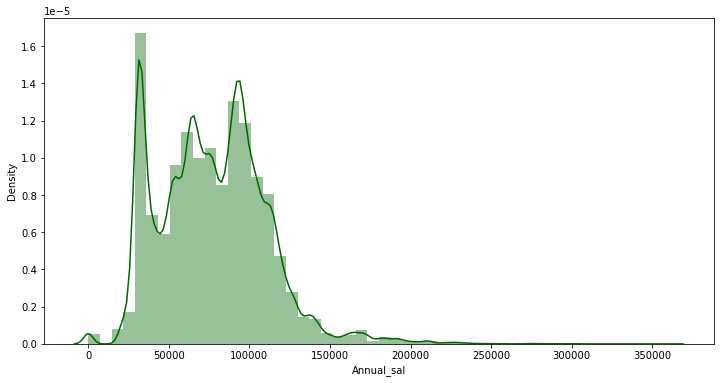

In [39]:
plt.figure(figsize = (12,6))
sns.distplot(data.Annual_sal,color = 'darkgreen')
plt.show()

**Creating different Sample  from the population**

In [24]:
payroll_2015 = data[data.Year ==2015]
payroll_2016 = data[data.Year ==2016]

**Calculating the Population Parameters**

In [26]:
pop_mean_2015 = payroll_2015['Annual_sal'].mean()
pop_std_2015 = statistics.stdev(payroll_2015.Annual_sal)
print("Population Mean: "+str(pop_mean_2015))
print("Population Standard Deviation: "+str(pop_std_2015))

Population Mean: 76046.39152505301
Population Standard Deviation: 34232.25489729045


**Calculating the Sample Parameters**

In [28]:
print("Population Mean: "+str(payroll_2016['Annual_sal'].mean()))
payroll_2016_sample = payroll_2016.sample(frac=0.10)
sample_mean_2016 = payroll_2016_sample['Annual_sal'].mean()
print("Sample Mean: "+str(sample_mean_2016))
sample_std_2016 = statistics.stdev(payroll_2016_sample.Annual_sal)
print("Sample Standard Deviation: "+str(sample_std_2016))

Population Mean: 78711.19987225177
Sample Mean: 78758.45162847824
Sample Standard Deviation: 33861.890420174364


**Hypothesis Testing**

<b>Normal distribution</b><br><br>
<b>Null Hypothesis</b> : Pay does not increase in 2016<br>
<b>Alternate Hypothesis</b>: It increases<br>
<b>Population parameters</b>: Mean = pop_mean_2015, standard deviation = pop_std_2015<br>
<b>Sample parameters</b> :   Mean = sample_mean_2016, standard deviation = sample_std_2016<br>

In [30]:
import math
# Confidence Level 95 %  for one sided Normal curve
zscore_critical = 1.65 
# Calculate the test statistics 
zscore_test_stat = ((sample_mean_2016 - pop_mean_2015)*math.sqrt(8916))/sample_std_2016
print(zscore_test_stat)

7.562634992800325


<b>Conclusion</b>: As the test statistics fall into the rejection region the null hypothesis is rejected<br>
and it can be concluded that the Annual salaries increase in 2016.<br>
However, we will first check for the <b>Type 1</b> and <b>Type 2 </b>Errors

**Type 1 type 2 hypothesis error**<br>
In statistical hypothesis testing, a type I error is the incorrect rejection of a true null hypothesis (a "false positive"), while a type II error is incorrectly retaining a false null hypothesis (a "false negative").

In [31]:
# we are basically checking the true value of the population characteristics
pop_mean_2016 = payroll_2016['Annual_sal'].mean()
pop_std_2016 = statistics.stdev(payroll_2016.Annual_sal)

zscore_error = ((pop_mean_2016 - pop_mean_2015)/pop_std_2016)
print(zscore_error)

0.07937359898019851


We can clearly see that we encountered a Type 1 error as the population mean is well within acceptable region

**Student T-distribution**<br>
**Null Hypothesis**: pay does not increase in 2016<br>
**Alternate Hypothesis**: it increases<br>
**Population parameters**: Mean = pop_mean_2015, standard deviation = pop_std_2015<br>
**Sample parameters** : Mean = sample_mean_2016, standard deviation = sample_std_2016<br>

In [35]:
#Calculating the Sample Parameters**
payroll_2014 = data[data.Year ==2014]
payroll_2015 = data[data.Year ==2015]
# Creating Sample distribution for T statistics
payroll_t_2015_sample = payroll_2015.sample(frac=0.00062)

In [36]:
payroll_t_2015_sample = payroll_2015.sample(frac=0.00062)
N = len(payroll_t_2015_sample)
sample_mean_2015 = payroll_t_2015_sample['Annual_sal'].mean()
sample_std_2015 = statistics.stdev(payroll_t_2015_sample.Annual_sal)
pop_std_2014  = statistics.stdev(payroll_2014.Annual_sal)
pop_mean_2014 = payroll_2014['Annual_sal'].mean()

In [37]:
# Confidence Level 95 %  for one sided T curve
t_critical = 1.311

# Calculate the test statistics 
tscore_test_stat = ((sample_mean_2015 - pop_mean_2014)*math.sqrt(N))/sample_std_2015

print(tscore_test_stat)

-0.4852186737566115


Depending on the Test score , we can accept/Reject the Null